In [16]:
%load_ext tensorboard
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import datetime



The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [17]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

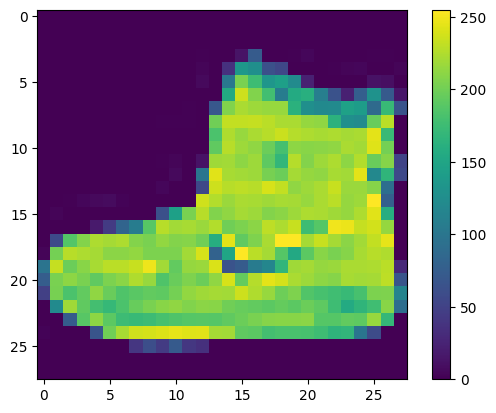

In [18]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [19]:
train_images = train_images / 255.0

test_images = test_images / 255.0

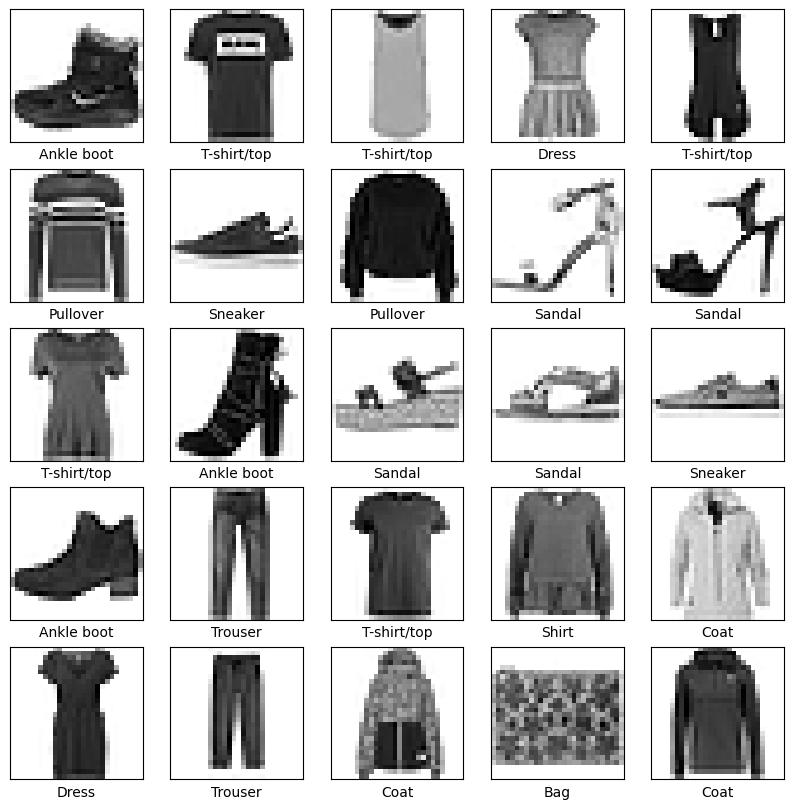

In [20]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [21]:
sequential_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

sequential_model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])


In [37]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir, histogram_freq=1)


In [38]:
sequential_model.fit(train_images, train_labels, epochs=10, callbacks=[tensorboard_callback])


Epoch 1/10
1875/1875 [==============================] - 2s 901us/step - loss: 0.2327 - accuracy: 0.9118
Epoch 2/10
1875/1875 [==============================] - 2s 856us/step - loss: 0.2242 - accuracy: 0.9158
Epoch 3/10
1875/1875 [==============================] - 2s 858us/step - loss: 0.2172 - accuracy: 0.9182
Epoch 4/10
1875/1875 [==============================] - 2s 863us/step - loss: 0.2114 - accuracy: 0.9204
Epoch 5/10
1875/1875 [==============================] - 2s 871us/step - loss: 0.2037 - accuracy: 0.9241
Epoch 6/10
1875/1875 [==============================] - 2s 862us/step - loss: 0.1998 - accuracy: 0.9262
Epoch 7/10
1875/1875 [==============================] - 2s 856us/step - loss: 0.1935 - accuracy: 0.9267
Epoch 8/10
1875/1875 [==============================] - 2s 855us/step - loss: 0.1874 - accuracy: 0.9293
Epoch 9/10
1875/1875 [==============================] - 2s 867us/step - loss: 0.1841 - accuracy: 0.9304
Epoch 10/10
1875/1875 [==============================] - 2s 838u

In [ ]:
%tensorboard --logdir logs/fit

In [23]:
test_loss, test_acc = sequential_model.evaluate(
    test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


313/313 - 0s - loss: 0.3496 - accuracy: 0.8763 - 208ms/epoch - 665us/step

Test accuracy: 0.8762999773025513


In [24]:
probability_model = tf.keras.Sequential([sequential_model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

print(predictions[0])


313/313 [==============================] - 0s 465us/step
[8.8033856e-05 6.4501722e-07 7.3230473e-07 5.7831734e-10 2.9105772e-07
 1.5987741e-03 2.8161201e-05 4.2076308e-02 1.3688550e-06 9.5620567e-01]


In [25]:
np.argmax(predictions[0])


9

In [26]:
test_labels[0]


9

In [27]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
               color=color)


def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


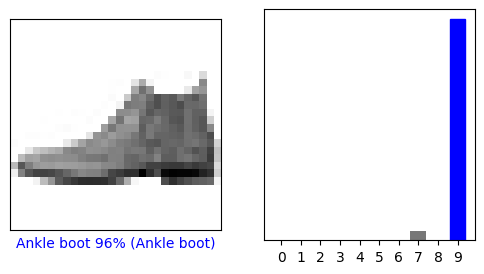

In [28]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


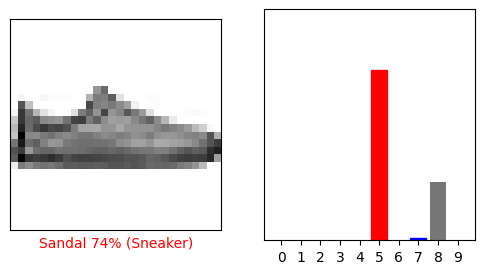

In [29]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


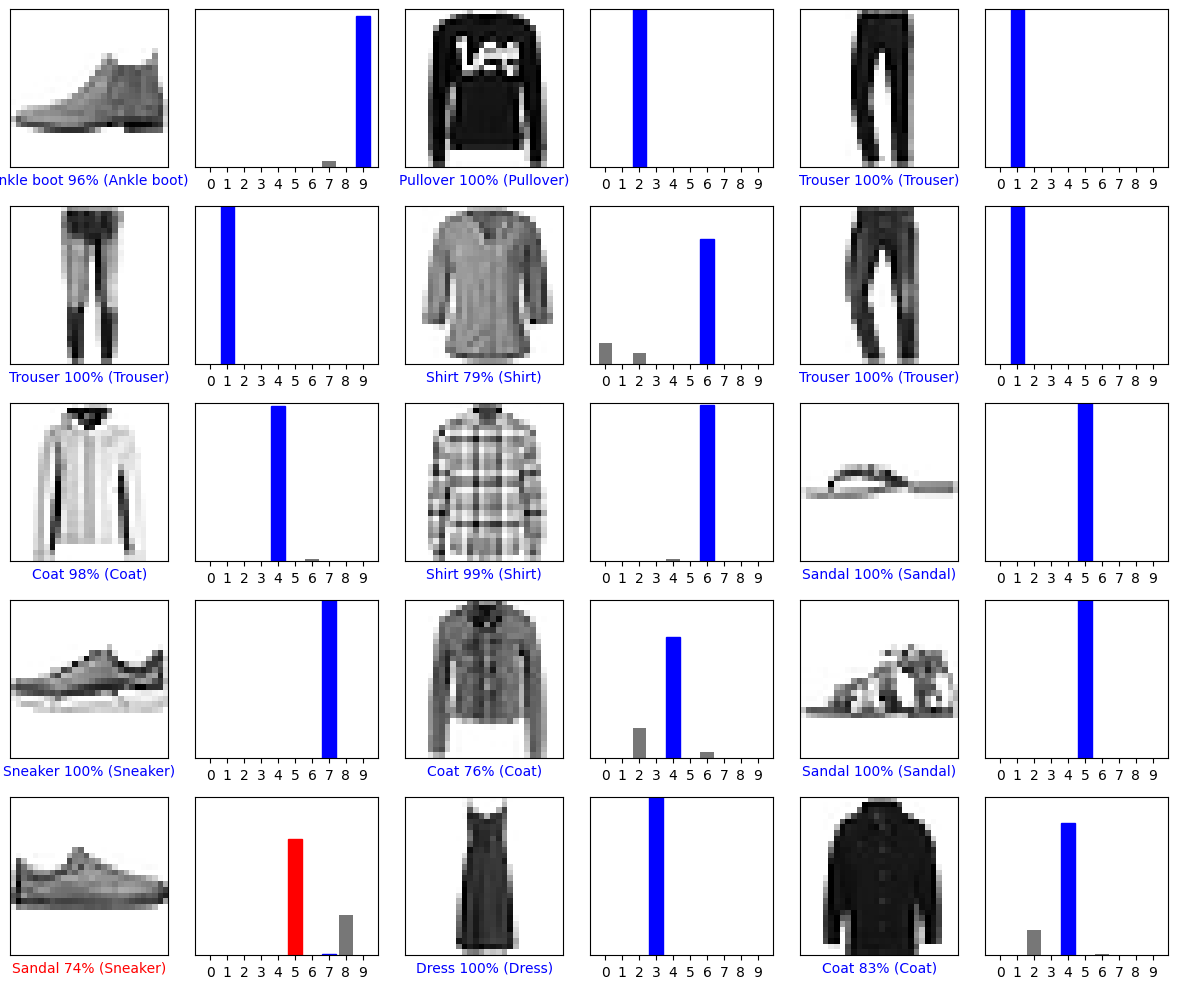

In [30]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


In [31]:
img = test_images[1]

print(img.shape)


(28, 28)


In [32]:
img = (np.expand_dims(img, 0))

print(img.shape)


(1, 28, 28)


In [33]:
predictions_single = probability_model.predict(img)

print(predictions_single)


1/1 [==============================] - 0s 10ms/step
[[5.8986961e-06 1.8305074e-15 9.9950600e-01 3.7302719e-10 1.5123656e-04
  6.1389001e-15 3.3680687e-04 1.9380920e-13 9.2861734e-12 1.7678658e-14]]


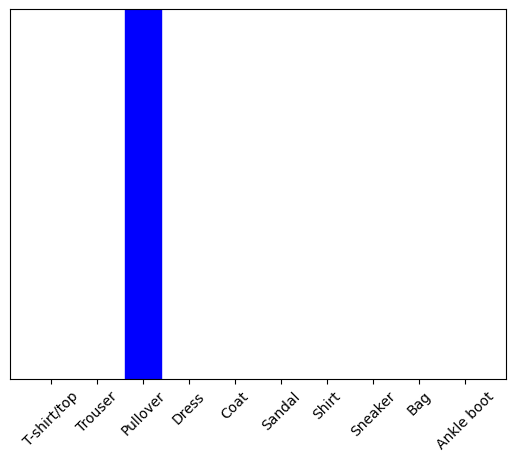

In [34]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()


In [35]:
np.argmax(predictions_single[0])

2